<a href="https://colab.research.google.com/github/hyuNsPark7177/iot/blob/master/iot_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data stored in MongoDB are saved in the json file.
- The data are composed of three time series; temperature, humidity, and luminosity.


In [0]:
import pandas as pd

In [0]:
# loading json file from MongoDB via web (CORS, port=3030)
url="http://chaos.inje.ac.kr:3030/iot"
j1=pd.read_json(url)

In [6]:
j1.head()

,__v,_id,date,humidity,luminosity,temperature
0,0,5bce24218d1ec32774d781a9,2018-10-23 04:25:21.349,39.7,0,23.2
1,0,5bce242b8d1ec32774d781aa,2018-10-23 04:25:31.594,39.7,0,23.2
2,0,5bce24358d1ec32774d781ab,2018-10-23 04:25:41.855,39.7,0,23.2
3,0,5bce24408d1ec32774d781ac,2018-10-23 04:25:52.100,39.7,0,23.2
4,0,5bce244a8d1ec32774d781ad,2018-10-23 04:26:02.360,39.7,0,23.2


In [7]:
j1.tail()

,__v,_id,date,humidity,luminosity,temperature
348901,0,5c05dbbdd156dd1d58a5fad8,2018-12-04 10:43:25.943,47.4,46,21.0
348902,0,5c05dbc8d156dd1d58a5fad9,2018-12-04 10:43:36.188,47.4,46,21.0
348903,0,5c05dbd2d156dd1d58a5fada,2018-12-04 10:43:46.449,47.4,46,21.0
348904,0,5c05dbdcd156dd1d58a5fadb,2018-12-04 10:43:56.693,47.2,46,21.0
348905,0,5c05dbe6d156dd1d58a5fadc,2018-12-04 10:44:06.955,47.2,46,20.9


In [8]:
j1.shape

(348906, 6)

In [9]:
j1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348906 entries, 0 to 348905
Data columns (total 6 columns):
__v            348906 non-null int64
_id            348906 non-null object
date           348906 non-null datetime64[ns]
humidity       348906 non-null float64
luminosity     348906 non-null int64
temperature    348906 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 18.6+ MB


### Dataframe with date and three sensor values(temperature, humidity, luminosity)

In [0]:
iot_data = j1[['date', 'temperature', 'humidity', 'luminosity']]

In [11]:
iot_data.shape

(348906, 4)

In [12]:
iot_data.head()

,date,temperature,humidity,luminosity
0,2018-10-23 04:25:21.349,23.2,39.7,0
1,2018-10-23 04:25:31.594,23.2,39.7,0
2,2018-10-23 04:25:41.855,23.2,39.7,0
3,2018-10-23 04:25:52.100,23.2,39.7,0
4,2018-10-23 04:26:02.360,23.2,39.7,0


In [13]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348906 entries, 0 to 348905
Data columns (total 4 columns):
date           348906 non-null datetime64[ns]
temperature    348906 non-null float64
humidity       348906 non-null float64
luminosity     348906 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 13.3 MB


In [0]:
# Save iot data in csv file.
# iot_data.to_csv('iot_data_181203.csv')

### Plot time series of sensor data

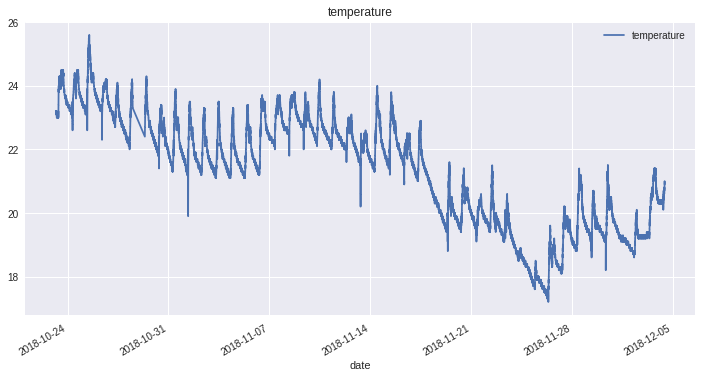

In [15]:
iot_data.plot(x='date', y='temperature', figsize=(12,6), title='temperature')

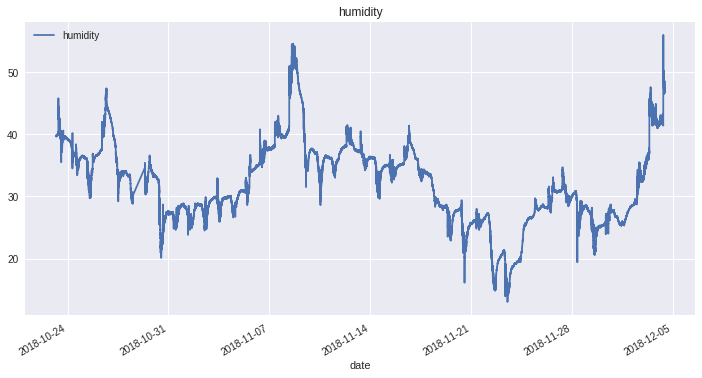

In [16]:
iot_data.plot(x='date', y='humidity', figsize=(12,6), title='humidity')

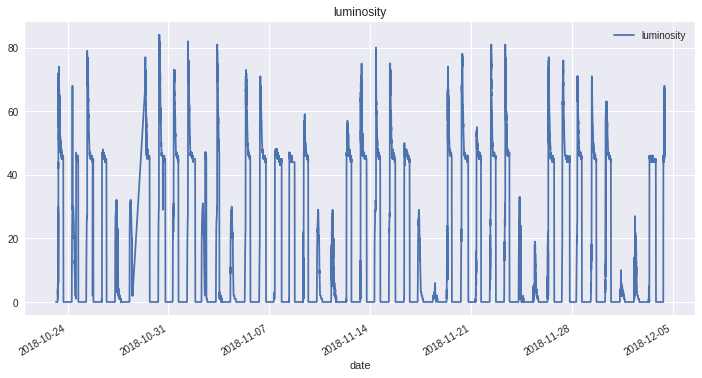

In [17]:

iot_data.plot(x='date', y='luminosity', figsize=(12,6), title='luminosity')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


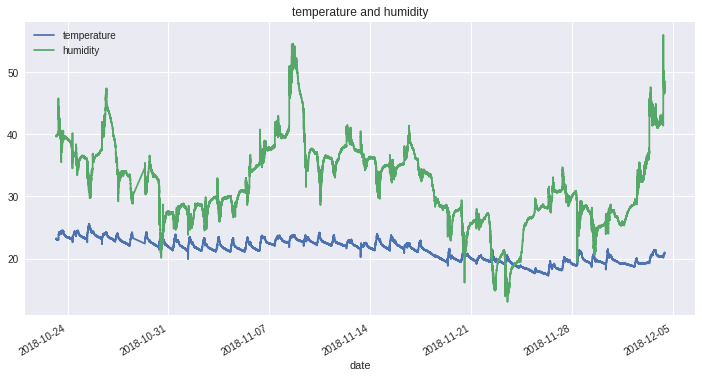

In [18]:
# Plot of ['temperature','humidity']
iot_data.plot(x='date', y=['temperature','humidity'], figsize=(12,6), title='temperature and humidity')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


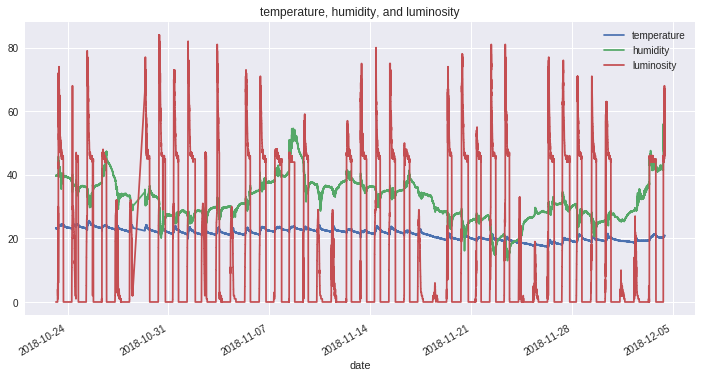

In [19]:
# Plot of ['temperature','humidity','luminosity']
iot_data.plot(x='date', y=['temperature','humidity','luminosity'], figsize=(12,6), 
             title='temperature, humidity, and luminosity')

#### Plot the mean of sensor data

In [20]:
iot_data[['temperature','humidity','luminosity']].mean()  

temperature    21.341967
humidity       31.980610
luminosity     14.781531
dtype: float64

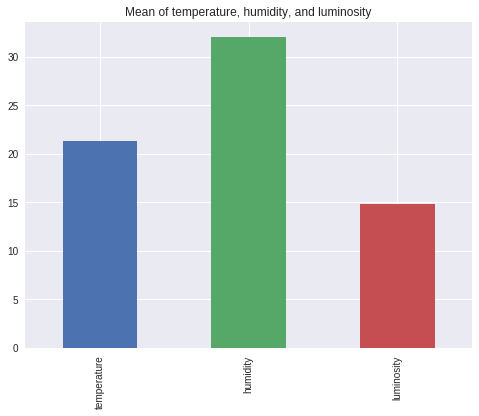

In [21]:
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(8,6), 
                                                                  title="Mean of temperature, humidity, and luminosity")

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, 1 week

### Set date as index of timestamp

In [0]:
iot_data.set_index('date',inplace=True)

In [23]:
iot_data.info() # timestamp index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348906 entries, 2018-10-23 04:25:21.349000 to 2018-12-04 10:44:06.955000
Data columns (total 3 columns):
temperature    348906 non-null float64
humidity       348906 non-null float64
luminosity     348906 non-null int64
dtypes: float64(2), int64(1)
memory usage: 10.6 MB


In [24]:
iot_data.head()

,temperature,humidity,luminosity
date,,,
2018-10-23 04:25:21.349,23.2,39.7,0
2018-10-23 04:25:31.594,23.2,39.7,0
2018-10-23 04:25:41.855,23.2,39.7,0
2018-10-23 04:25:52.100,23.2,39.7,0
2018-10-23 04:26:02.360,23.2,39.7,0


In [25]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean()

,temperature,humidity,luminosity
date,,,
2018-10-23 04:25:00,23.200000,39.700000,0.000000
2018-10-23 04:26:00,23.183333,39.700000,0.000000
2018-10-23 04:27:00,23.133333,39.700000,0.000000
2018-10-23 04:28:00,23.116667,39.716667,0.000000
2018-10-23 04:29:00,23.133333,39.700000,0.000000
2018-10-23 04:30:00,23.183333,39.700000,0.000000
2018-10-23 04:31:00,23.100000,39.700000,0.000000
2018-10-23 04:32:00,23.100000,39.700000,0.000000
2018-10-23 04:33:00,23.183333,39.700000,0.000000


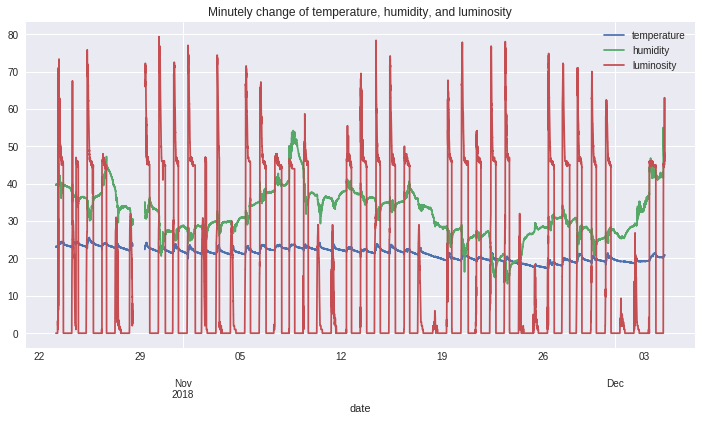

In [26]:
#  Plot mean of the iot data per every minute
iot_data.resample('60S').mean().plot(figsize=(12,6), 
                                     title='Minutely change of temperature, humidity, and luminosity')

In [27]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour

,temperature,humidity,luminosity
date,,,
2018-10-23 04:00:00,23.127094,39.734483,0.000000
2018-10-23 05:00:00,23.104274,39.778063,0.000000
2018-10-23 06:00:00,23.069231,39.824217,0.000000
2018-10-23 07:00:00,23.027273,39.944034,1.698864
2018-10-23 08:00:00,23.235328,41.792593,36.566952
2018-10-23 09:00:00,23.993162,42.055556,57.826211
2018-10-23 10:00:00,24.088319,41.014245,50.509972
2018-10-23 11:00:00,24.114530,39.863248,49.131054
2018-10-23 12:00:00,24.058405,39.641880,47.962963


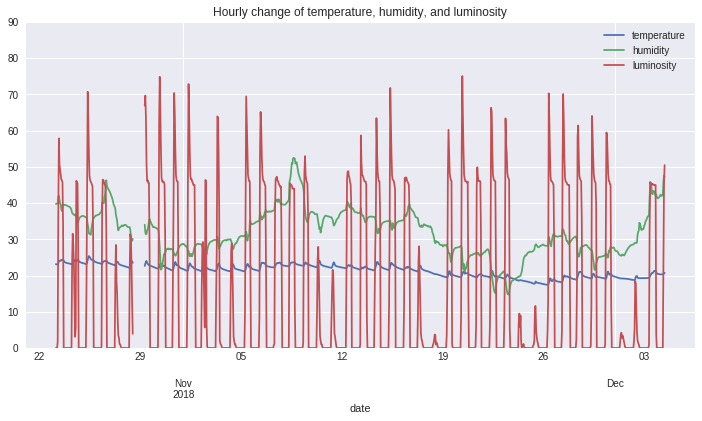

In [28]:
#  Plot mean of the iot data per every hour 
iot_data.resample('H').mean().plot(figsize=(12,6), 
                                   title='Hourly change of temperature, humidity, and luminosity', 
                                   ylim=[0,90])

In [29]:
# Estimate the mean of iot data for every day
iot_data.resample('D').mean()

,temperature,humidity,luminosity
date,,,
2018-10-23,23.740879,39.717064,21.239453
2018-10-24,23.689047,36.923140,12.379257
2018-10-25,23.987220,34.861267,23.227839
2018-10-26,23.571018,40.612865,14.244244
2018-10-27,23.046031,36.050291,4.094696
2018-10-28,22.738164,32.456824,9.665755
2018-10-29,22.944932,33.518881,27.371317
2018-10-30,22.385843,28.106954,24.395514
2018-10-31,22.246256,27.182687,19.046161


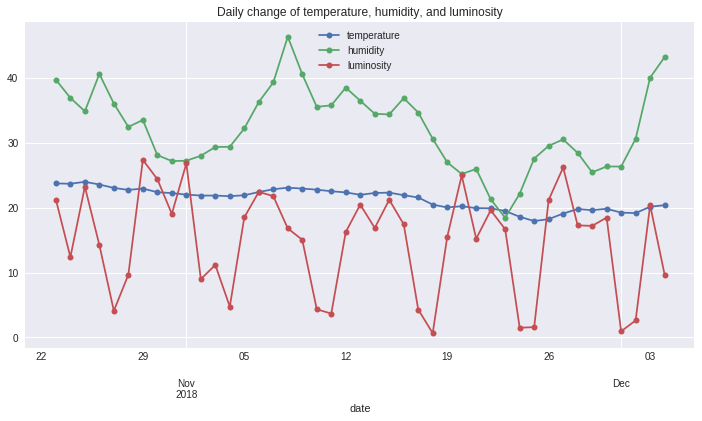

In [30]:
#  Plot mean of the iot data per every day
iot_data.resample('D').mean().plot(kind='line', marker='o', ms=6, figsize=(12,6), 
                                   title='Daily change of temperature, humidity, and luminosity')

In [31]:
# Estimate the mean of iot data for every week
iot_data.resample('W').mean()

,temperature,humidity,luminosity
date,,,
2018-10-28,23.517429,37.055706,14.298688
2018-11-04,22.114018,28.723534,16.969638
2018-11-11,22.644056,38.010011,14.654031
2018-11-18,21.840311,35.147682,13.874688
2018-11-25,19.444706,23.945160,13.571538
2018-12-02,19.281131,28.179847,14.839227
2018-12-09,20.221882,41.025728,17.085431


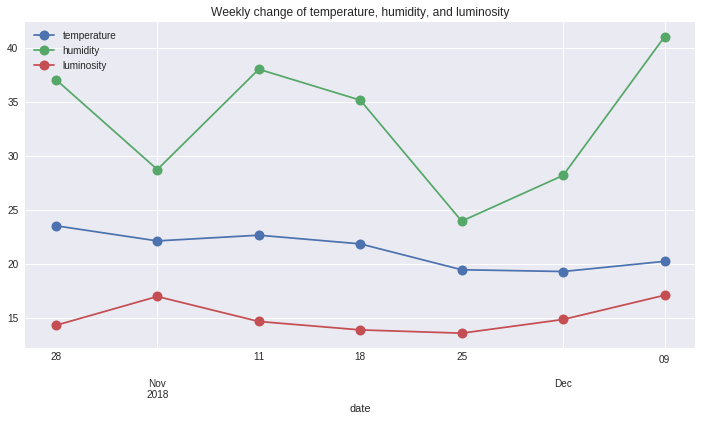

In [32]:
#  Plot mean of the iot data per every week
iot_data.resample('W').mean().plot(kind='line', marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature, humidity, and luminosity')

## Great!